## Feature scoring
In this notebook feature scoring is used to evaluate the relevance/contribution of the uncertainties in the outcomes of the model. In this particullar case the outcomes are based on the intrest of the Delta Comission:
1. Expected Annual Damage
2. Dike Investment Costs
3. RfR Investment Costs
4. Evacuation Costs
5. Expected Number of Deaths


----------
### 0. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring

from problem_formulation import get_model_for_problem_formulation

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [2]:
# Load the results of the baseline scenario
loaded_results = load_results('sequential_results.tar.gz')
experminents, outcomes = loaded_results

---
### 1. Feature Scaling

In [4]:
x = outcomes
y = experminents


In [7]:
# Import the model
dike_model, planning_steps = get_model_for_problem_formulation(6) 

In [20]:
# Because all levers are set to 0, we can remove them from the outcomes
cleaned_y = y.drop(columns=[l.name for l in dike_model.levers])

In [9]:
# Get the feature scores
scores = feature_scoring.get_feature_scores_all(cleaned_y,x)

In [17]:
# Because investment costs will always be 0 when levers are set to 0, we can remove them
scores.drop(columns=['Dike Investment Costs','RfR Investment Costs','Evacuation Costs'], inplace=True)

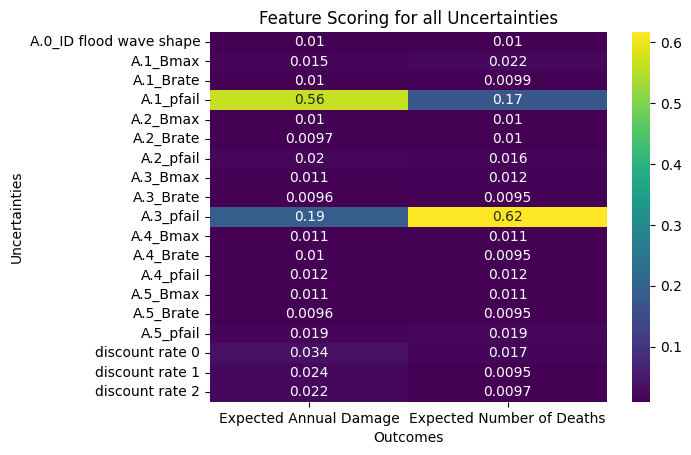

In [21]:
# Plot the feature scores
import seaborn as sns

sns.heatmap(scores, annot=True, cmap='viridis')
plt.title('Feature Scoring for all Uncertainties')
plt.xlabel('Outcomes')
plt.ylabel('Uncertainties')
plt.show()

----
## 2. Results

**A1_pfail (Probability of Failure for Levee Ring 1):**
- Expected Annual Damage: This uncertainty has the highest score (0.56), indicating it is the most critical factor influencing expected annual damage.
- Expected Number of Deaths: It also has a significant impact (0.17), though less critical than for annual damage.

**A3_pfail (Probability of Failure for Levee Ring 3):**
- Expected Annual Damage: This factor is important (0.19) but less so compared to A1_pfail.
- Expected Number of Deaths: It has the highest influence (0.62), making it the most critical factor affecting the number of flood casualties.

**Discount Rates:**
- Expected Annual Damage: Discount rate 0 has some influence (0.034), followed by discount rate 1 (0.024) and discount rate 2 (0.022). Although these factors are not as significant as the failure probabilities, they still play a role in determining expected annual damage.
- Expected Number of Deaths: Discount rates have minor impacts on the expected number of deaths, with values around 0.01.

**Other Variables:**
Variables such as breach width (A1_Bmax, A2_Bmax, etc.) and breach growth rate (A1_Brate, A2_Brate, etc.) generally have low scores, indicating minimal influence on both expected annual damage and expected number of deaths.